<a href="https://colab.research.google.com/github/AGR-Yes/RuPauls-Drag-Race-Winner-Prediction/blob/main/RPDR_Winner_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RuPaul's Drag Race Winner Prediciton

**Author:** Anton Reyes

## **Introduction**

### **Requirements and Imports**

#### **Imports**

**Basic Libraries**

* `numpy` contains a large collection of mathematical functions
* `pandas` contains functions that are designed for data manipulation and data analysis



In [1]:
import numpy as np
import pandas as pd

**Visualization Libraries**

* `matplotlib.pyplot` contains functions to create interactive plots
* `seaborn` is a library based on matplotlib that allows for data visualization
* `plotly` is an open-source graphing library for Python.

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**Natural Language Processing Libraries**
* `re` is a module that allows the use of regular expressions
* `string` contains functions for string operations

In [3]:
import re
import string

**Google Drive**
* `google.colab` a library that allows the colab notebook to mount the google drive

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

#### **Datasets and Files**

The following `csv` file was used for this project:

- `RPDR Database_winner.csv` contains all the winners of the Drag Race franchise as well as the placements of each winner in certain maxi (major) challenges. This dataset also contains the final four of some Drag Race franchises as of March 31, 2023.

## **Data Collection**

Importing the dataset

In [4]:
url = "https://raw.githubusercontent.com/AGR-Yes/RuPauls-Drag-Race-Winner-Prediction/main/RPDR_Winners_2023.csv?token=GHSAT0AAAAAACAXZ3YRNZFMQSK64PVJ7FQIZBKZJAQ"

df = pd.read_csv(url)
df.head()

,Placement,Country,Season,Queen,Design,Snatch Game,Ball,Makeover,Acting,Girl Groups,Rusical,Unnamed: 11,Unnamed: 12
0,winner,AUS,1,Kita Mean,SAFE,HIGH,NaN,WIN,NaN,HIGH,NaN,NaN,4
1,winner,AUS,2,Spankie Jackzon,BTM,HIGH,NaN,HIGH,WIN,WIN,NaN,NaN,5
2,winner,CAN,1,Priyanka,SAFE,BTM,SAFE,WIN,HIGH,WIN,NaN,NaN,6
3,winner,CAN,2,Icesis Couture,WIN,SAFE,WIN,BTM,SAFE,HIGH,BTM,ALL 7,7
4,winner,CAN,3,Gisele Lullaby,WIN,WIN,HIGH,NaN,NaN,NaN,BTM,NaN,4


## **Description of the Dataset**

Here, we find the shape of the dataset.

In [5]:
df.shape

(51, 13)

By looking at the `info` of the dataframe, we can see that there are `non-null` values. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Placement    51 non-null     object
 1   Country      51 non-null     object
 2   Season       51 non-null     int64 
 3   Queen        51 non-null     object
 4   Design       36 non-null     object
 5   Snatch Game  50 non-null     object
 6   Ball         36 non-null     object
 7   Makeover     41 non-null     object
 8   Acting       40 non-null     object
 9   Girl Groups  25 non-null     object
 10  Rusical      28 non-null     object
 11  Unnamed: 11  7 non-null      object
 12  Unnamed: 12  51 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 5.3+ KB


By displaying the number of queens and the placements, we can confirm that there are 51 contestants and rows to be worked on. 

But by looking at the information above, there are columns (maxi-challenges) that show null values. This is because not all of the stated-maxi challenges are in every season and franchise of Drag Race.

In [7]:
display(df['Placement'].value_counts(), print('Number of Queens:', df['Placement'].count()))

Number of Queens: 51


winner    43
final      8
Name: Placement, dtype: int64

None

## **Exploratory Data Analysis**

The following questions are asked to guide the EDA.

1. How many placements are there per challenge column?
2. What is the most occurring placement per challenge?
3. Which challenge has the most complete appearances? Which had the least?
4. What is the most number of challenges per season? How many is the least?
5. What is the average number of *notable* challenges per season?

### **1. How many placements are there per challenge column?**

We first get the `challenge` column names and then create a new dataframe with the counts of the 5 different placements per column

In [8]:
placements = df[['Design', 'Snatch Game', 'Ball', 'Makeover', 'Acting', 'Girl Groups', 'Rusical']].apply(pd.Series.value_counts)

We then make a list of rows to make a custom order in the new dataframe.

In [9]:
row_order = ['WIN','HIGH','SAFE','LOW','BTM']

By resetting the index, we can easily access the dataframe when needed - especially when it come to visualization.

In [10]:
placements = placements.reindex(row_order).reset_index()

placements

,index,Design,Snatch Game,Ball,Makeover,Acting,Girl Groups,Rusical
0,WIN,10,16,12,13,12,7,4
1,HIGH,5,11,12,16,12,7,7
2,SAFE,17,15,9,2,13,7,11
3,LOW,2,3,1,4,1,1,2
4,BTM,2,5,2,6,2,3,4


### **2. What is the most occurring placement per challenge?**

By getting the mode of each `challenge` column, we can see which challenge has had the most occuring placement regardless of season.

In [11]:
challenge_mode = pd.DataFrame(df[['Design', 'Snatch Game', 'Ball', 'Makeover', 'Acting', 'Girl Groups', 'Rusical']].mode().iloc[0])

challenge_mode.transpose()

,Design,Snatch Game,Ball,Makeover,Acting,Girl Groups,Rusical
0,SAFE,WIN,HIGH,HIGH,SAFE,HIGH,SAFE


Even though we can see the most occuring placement, it should be noted that not all contestants had complete notable challenges in the seasons they competed in.

### **3. Which challenge has the most complete appearances? Which had the least?**

According to the dataset description, there are 51 contestants in the dataset. 43 of which are winners and 8 of them being the top four finalists.

Now, we get the number of appearances each challenge did in all the winners' seasons by checking the rows itself.

In [12]:
appear = pd.DataFrame(df[['Design', 'Snatch Game', 'Ball', 'Makeover', 'Acting', 'Girl Groups', 'Rusical']].count()).reset_index()
appear.sort_values([0], ascending=False)

,index,0
1,Snatch Game,50
3,Makeover,41
4,Acting,40
0,Design,36
2,Ball,36
6,Rusical,28
5,Girl Groups,25


By getting the columns and creating a new dataframe with counts, we can see the challenge that appears almost every season: `Snatch Game.`

### **4. What is the most number of challenges per season? How many is the least?**

We create a new dataframe for counting the challenge placements.

In [13]:
desc = pd.DataFrame(df[['Design', 'Snatch Game', 'Ball', 'Makeover', 'Acting', 'Girl Groups', 'Rusical']])

After that, we count all the `non-null` values present in the `desc` dataframe.

In [14]:
desc['count'] = desc.apply(lambda row: row.count(), axis = 1)

We then use the `.describe` function to quantitatively describe the `count` column.

In [15]:
desc['count'].describe()

count    51.000000
mean      5.019608
std       1.122323
min       3.000000
25%       4.000000
50%       5.000000
75%       6.000000
max       7.000000
Name: count, dtype: float64

We can see here that the most number of challenges in a singular season can be `7`.

While the least number would be `3` challenges.

### **5. What is the average number of challenges per season?**

Based on the `desc` dataframe, the average number of challenges per season is `5`. Similarly, the median of the column is also `5`. 

## **Data Preprocessing**

#### **Data Preprocessing**

In [16]:
df.head()

,Placement,Country,Season,Queen,Design,Snatch Game,Ball,Makeover,Acting,Girl Groups,Rusical,Unnamed: 11,Unnamed: 12
0,winner,AUS,1,Kita Mean,SAFE,HIGH,NaN,WIN,NaN,HIGH,NaN,NaN,4
1,winner,AUS,2,Spankie Jackzon,BTM,HIGH,NaN,HIGH,WIN,WIN,NaN,NaN,5
2,winner,CAN,1,Priyanka,SAFE,BTM,SAFE,WIN,HIGH,WIN,NaN,NaN,6
3,winner,CAN,2,Icesis Couture,WIN,SAFE,WIN,BTM,SAFE,HIGH,BTM,ALL 7,7
4,winner,CAN,3,Gisele Lullaby,WIN,WIN,HIGH,NaN,NaN,NaN,BTM,NaN,4


##### **Concatenating Columns**

Instead of having to display the `country` and `season` separately, we join them into one column instead.

In [17]:
df['code'] = df['Country'].astype(str) + df['Season'].astype(str)

df.head()

,Placement,Country,Season,Queen,Design,Snatch Game,Ball,Makeover,Acting,Girl Groups,Rusical,Unnamed: 11,Unnamed: 12,code
0,winner,AUS,1,Kita Mean,SAFE,HIGH,NaN,WIN,NaN,HIGH,NaN,NaN,4,AUS1
1,winner,AUS,2,Spankie Jackzon,BTM,HIGH,NaN,HIGH,WIN,WIN,NaN,NaN,5,AUS2
2,winner,CAN,1,Priyanka,SAFE,BTM,SAFE,WIN,HIGH,WIN,NaN,NaN,6,CAN1
3,winner,CAN,2,Icesis Couture,WIN,SAFE,WIN,BTM,SAFE,HIGH,BTM,ALL 7,7,CAN2
4,winner,CAN,3,Gisele Lullaby,WIN,WIN,HIGH,NaN,NaN,NaN,BTM,NaN,4,CAN3


##### **Dropping and Reorganizing of Columns**

Before dropping any columns, we first get the column names.

In [18]:
df.columns

Index(['Placement', 'Country', 'Season', 'Queen', 'Design', 'Snatch Game',
       'Ball', 'Makeover', 'Acting', 'Girl Groups', 'Rusical', 'Unnamed: 11',
       'Unnamed: 12', 'code'],
      dtype='object')

We make a list of columns to drop that would not be needed further in the analysis.

In [19]:
drop_col = [ "Country", "Season", 'Unnamed: 11', 'Unnamed: 12']

In [20]:
df = df.drop(drop_col, axis = 1)

df.head()

,Placement,Design,Snatch Game,Ball,Makeover,Acting,Girl Groups,Rusical,code
0,winner,SAFE,HIGH,NaN,WIN,NaN,HIGH,NaN,AUS1
1,winner,BTM,HIGH,NaN,HIGH,WIN,WIN,NaN,AUS2
2,winner,SAFE,BTM,SAFE,WIN,HIGH,WIN,NaN,CAN1
3,winner,WIN,SAFE,WIN,BTM,SAFE,HIGH,BTM,CAN2
4,winner,WIN,WIN,HIGH,NaN,NaN,NaN,BTM,CAN3


We now reposition the `code` column by 

In [21]:
df.columns.tolist()

['Placement',
 'Design',
 'Snatch Game',
 'Ball',
 'Makeover',
 'Acting',
 'Girl Groups',
 'Rusical',
 'code']

In [22]:
df = df[['Placement', 'code', 'Design', 'Snatch Game', 'Ball', 'Makeover', 'Acting', 'Girl Groups', 'Rusical']]

df.head(2)

,Placement,code,Design,Snatch Game,Ball,Makeover,Acting,Girl Groups,Rusical
0,winner,AUS1,SAFE,HIGH,NaN,WIN,NaN,HIGH,NaN
1,winner,AUS2,BTM,HIGH,NaN,HIGH,WIN,WIN,NaN


##### **Count of Row**

We get and make a list of the challenge columns.

In [25]:
col_list = df[['Design', 'Snatch Game', 'Ball', 'Makeover','Acting', 'Girl Groups', 'Rusical']].columns.tolist()

This is to find out the number of episodes that are available in a season or that a contestant has participated in.

Using the count function, we can count the number of non-null values.

We add the counted values as a new column in `df_score`

In [75]:
ep_count = df[col_list].count(axis = 1)

main_df = df.copy(deep = True)

main_df.head()

,Placement,code,Design,Snatch Game,Ball,Makeover,Acting,Girl Groups,Rusical
0,winner,AUS1,SAFE,HIGH,NaN,WIN,NaN,HIGH,NaN
1,winner,AUS2,BTM,HIGH,NaN,HIGH,WIN,WIN,NaN
2,winner,CAN1,SAFE,BTM,SAFE,WIN,HIGH,WIN,NaN
3,winner,CAN2,WIN,SAFE,WIN,BTM,SAFE,HIGH,BTM
4,winner,CAN3,WIN,WIN,HIGH,NaN,NaN,NaN,BTM


After making a copy of `df` and getting the counting the non-null values in the challenges column, we now make a new column in the `main_df` for the counts and add that in. 

In [77]:
main_df['count'] = ep_count

main_df.head()

,Placement,code,Design,Snatch Game,Ball,Makeover,Acting,Girl Groups,Rusical,count
0,winner,AUS1,SAFE,HIGH,NaN,WIN,NaN,HIGH,NaN,4
1,winner,AUS2,BTM,HIGH,NaN,HIGH,WIN,WIN,NaN,5
2,winner,CAN1,SAFE,BTM,SAFE,WIN,HIGH,WIN,NaN,6
3,winner,CAN2,WIN,SAFE,WIN,BTM,SAFE,HIGH,BTM,7
4,winner,CAN3,WIN,WIN,HIGH,NaN,NaN,NaN,BTM,4


##### **Splitting the Dataset**

We split the dataset separately into the `winners` and `finalists` so that we can drop more columns and work with the columns we need.

In [78]:
winners = main_df.loc[df['Placement'] == 'winner']

winners.head()

,Placement,code,Design,Snatch Game,Ball,Makeover,Acting,Girl Groups,Rusical,count
0,winner,AUS1,SAFE,HIGH,NaN,WIN,NaN,HIGH,NaN,4
1,winner,AUS2,BTM,HIGH,NaN,HIGH,WIN,WIN,NaN,5
2,winner,CAN1,SAFE,BTM,SAFE,WIN,HIGH,WIN,NaN,6
3,winner,CAN2,WIN,SAFE,WIN,BTM,SAFE,HIGH,BTM,7
4,winner,CAN3,WIN,WIN,HIGH,NaN,NaN,NaN,BTM,4


In [79]:
finalists = main_df.loc[df['Placement'] == 'final'].reset_index(drop = True)

finalists.head()

,Placement,code,Design,Snatch Game,Ball,Makeover,Acting,Girl Groups,Rusical,count
0,final,US15,SAFE,SAFE,HIGH,WIN,HIGH,LOW,WIN,7
1,final,US15,SAFE,HIGH,HIGH,HIGH,WIN,HIGH,HIGH,7
2,final,US15,HIGH,SAFE,WIN,HIGH,SAFE,HIGH,HIGH,7
3,final,US15,WIN,SAFE,SAFE,BTM,SAFE,SAFE,HIGH,7
4,final,BEL1,NaN,LOW,SAFE,WIN,SAFE,NaN,NaN,4


### **Data Cleaning**

### **Feature Extraction**

##### **Winner and Finalist Values**

In [106]:
main_df['Placement'] = main_df['Placement'].replace({'winner':1, 'final':0})
display(main_df.head(2), main_df.tail(2))

,Placement,code,Design,Snatch Game,Ball,Makeover,Acting,Girl Groups,Rusical,count
0,1,AUS1,SAFE,HIGH,NaN,WIN,NaN,HIGH,NaN,4
1,1,AUS2,BTM,HIGH,NaN,HIGH,WIN,WIN,NaN,5


,Placement,code,Design,Snatch Game,Ball,Makeover,Acting,Girl Groups,Rusical,count
49,0,BEL1,NaN,WIN,HIGH,BTM,SAFE,NaN,NaN,4
50,0,BEL1,NaN,HIGH,WIN,LOW,BTM,NaN,NaN,4


##### **Column Conversion**

This column conversion is mainly to convert the categorical data. This isn't affecting the main dataframe, but rather a copy of it. 

Before converting any objects to integer values, first we check the kinds of placements available. Since the `Snatch Game` column has the most values in terms of placement, that will be used.

In [107]:
print(main_df['Snatch Game'].unique())

['HIGH' 'BTM' 'SAFE' 'WIN' 'LOW' nan]


Now that we have the placements, we map the values accordingly and assign a certain score through a copy. Another copy will be made for one hot encoded dataset.

In [108]:
score_df = main_df.copy(deep = True) #score df
ohe_df = main_df.copy(deep = True) #one hot encoded df

##### **Mapping the Scores per Placement**

Here we map the scores based on placements

In [109]:
score_df[col_list] = score_df[col_list].replace({'WIN':5, 'HIGH':4, 'SAFE':3, 'LOW':2, 'BTM':1})

In [110]:
score_df.head()

,Placement,code,Design,Snatch Game,Ball,Makeover,Acting,Girl Groups,Rusical,count
0,1,AUS1,3.0,4.0,NaN,5.0,NaN,4.0,NaN,4
1,1,AUS2,1.0,4.0,NaN,4.0,5.0,5.0,NaN,5
2,1,CAN1,3.0,1.0,3.0,5.0,4.0,5.0,NaN,6
3,1,CAN2,5.0,3.0,5.0,1.0,3.0,4.0,1.0,7
4,1,CAN3,5.0,5.0,4.0,NaN,NaN,NaN,1.0,4


##### **Filling in the NaN**

In [111]:
score_df.fillna(0, inplace = True)
score_df.head()

,Placement,code,Design,Snatch Game,Ball,Makeover,Acting,Girl Groups,Rusical,count
0,1,AUS1,3.0,4.0,0.0,5.0,0.0,4.0,0.0,4
1,1,AUS2,1.0,4.0,0.0,4.0,5.0,5.0,0.0,5
2,1,CAN1,3.0,1.0,3.0,5.0,4.0,5.0,0.0,6
3,1,CAN2,5.0,3.0,5.0,1.0,3.0,4.0,1.0,7
4,1,CAN3,5.0,5.0,4.0,0.0,0.0,0.0,1.0,4


##### **Correlation Heatmap**

To see and check for any correlated values, we make and check the heatmap to see which of the challenges have the highest correlation.

In [112]:
score_challenges = score_df[col_list].copy(deep = True)

Here we see the correlation table.

In [113]:
score_challenges.corr()

,Design,Snatch Game,Ball,Makeover,Acting,Girl Groups,Rusical
Design,1.000000,-0.033087,-0.101747,0.099143,0.028909,0.160868,0.100912
Snatch Game,-0.033087,1.000000,-0.217210,0.000897,-0.143795,-0.191004,-0.097189
Ball,-0.101747,-0.217210,1.000000,-0.363606,-0.046631,-0.167074,0.067856
Makeover,0.099143,0.000897,-0.363606,1.000000,-0.012215,-0.062110,0.039559
Acting,0.028909,-0.143795,-0.046631,-0.012215,1.000000,0.133076,0.020799
Girl Groups,0.160868,-0.191004,-0.167074,-0.062110,0.133076,1.000000,-0.061520
Rusical,0.100912,-0.097189,0.067856,0.039559,0.020799,-0.061520,1.000000


Presented here is the heatmap to better see the values

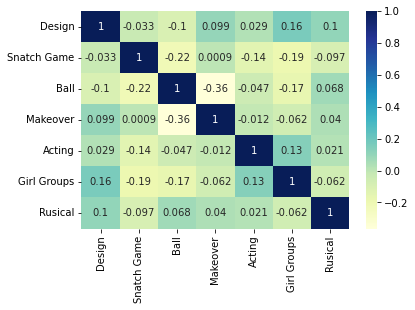

In [114]:
dataplot = sns.heatmap(score_challenges.corr(), cmap="YlGnBu", annot = True)

plt.show()

##### **One-hot encoding**

In [115]:
ohe_df = pd.get_dummies(ohe_df, columns = col_list)

In [116]:
ohe_df.head()

,Placement,code,count,Design_BTM,Design_HIGH,Design_LOW,Design_SAFE,Design_WIN,Snatch Game_BTM,Snatch Game_HIGH,...,Girl Groups_BTM,Girl Groups_HIGH,Girl Groups_LOW,Girl Groups_SAFE,Girl Groups_WIN,Rusical_BTM,Rusical_HIGH,Rusical_LOW,Rusical_SAFE,Rusical_WIN
0,1,AUS1,4,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,1,AUS2,5,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1,CAN1,6,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,1,CAN2,7,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,1,CAN3,4,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


# **Saving Dataframes as CSVs**

In [117]:
main_df.to_csv('data\main.csv')

score_df.to_csv('data\score.csv')

ohe_df.to_csv('data\ohe.csv')